In [44]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [47]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.Timestamp = df.Timestamp.dt.tz_localize('UTC').dt.tz_convert('US/Central')
df.head()

TypeError: Already tz-aware, use tz_convert to convert.

In [48]:
price=df['Weighted_Price']

In [49]:
min_periods = 120

# Calculate the sd and volatility
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
df['Volatility']=vol
df['SD']=sd
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Volatility,SD
3161052,2018-01-07 17:56:00-06:00,16167.98,16179.65,16154.59,16154.60,2.887541,46660.414604,16159.221330,1187.986958,108.447876
3161053,2018-01-07 17:57:00-06:00,16178.07,16178.07,16142.13,16176.43,1.014694,16402.389804,16164.858364,1185.932321,108.260314
3161054,2018-01-07 17:58:00-06:00,16131.19,16176.10,16114.30,16114.30,16.897225,272434.236630,16123.016402,1193.597227,108.960021
3161055,2018-01-07 17:59:00-06:00,16169.82,16189.43,16114.49,16124.02,6.384757,103222.040090,16166.949978,1192.751476,108.882815
3161056,2018-01-07 18:00:00-06:00,16173.98,16176.96,16102.05,16166.78,25.633791,413278.394640,16122.406640,1200.520177,109.591997


In [56]:
#Convert Timestamp into separate Date and Time
temp = pd.DatetimeIndex(df['Timestamp']) #Gather all datetime objects
df['Date'] = temp.date #Pull out the date from the datetime objects and assign to Date column
df['Time'] = temp.time #Pull out the time from the datetime objects and assign to Time column
del df['Timestamp'] #Delete original datetime column

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Volatility,SD,min,max,Date,Time
0,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,NaN,NaN,NaN,NaN,2011-12-31,01:52:00
1,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,NaN,NaN,NaN,NaN,2011-12-31,01:53:00
2,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,NaN,NaN,NaN,NaN,2011-12-31,01:54:00
3,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,NaN,NaN,NaN,NaN,2011-12-31,01:55:00
4,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,NaN,NaN,NaN,NaN,2011-12-31,01:56:00


In [57]:
index_1 = df[df.Date == datetime.date(dt.datetime.strptime('11/13/17', '%x'))].index[0]
index_2 = df[df.Date == datetime.date(dt.datetime.strptime('11/14/17', '%x'))].index[0]
df= df.loc[index_1:index_2]
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Volatility,SD,min,max,Date,Time
3080776,6225.51,6264.95,6225.45,6264.87,4.280439,26743.883673,6247.930101,1166.043730,106.444742,NaN,6247.930101,2017-11-13,00:00:00
3080777,6264.90,6266.46,6261.79,6266.46,57.303375,359084.618900,6266.378158,1168.400831,106.659915,NaN,6266.378158,2017-11-13,00:01:00
3080778,6266.46,6266.46,6264.58,6266.46,22.837611,143110.883390,6266.455884,1169.142276,106.727600,NaN,6266.455884,2017-11-13,00:02:00
3080779,6266.46,6266.46,6266.45,6266.45,10.198072,63905.808841,6266.459688,1168.658893,106.683473,NaN,6266.459688,2017-11-13,00:03:00
3080780,6266.09,6266.46,6256.01,6266.46,51.373019,321627.149490,6260.623874,1166.377080,106.475173,NaN,6260.623874,2017-11-13,00:04:00


In [62]:
df['max'] = pd.rolling_max(price, 120)
df['min'] = pd.rolling_min(price, 120)

df.tail()

/Users/ran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=120,center=False).max()
  """Entry point for launching an IPython kernel.
/Users/ran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=120,center=False).min()
  
/Users/ran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyW

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Volatility,SD,min,max,Date,Time
3082212,6563.61,6582.50,6559.61,6582.48,3.565243,23419.114419,6568.729052,395.774505,36.129104,6541.625962,6706.852570,2017-11-13,23:56:00
3082213,6582.86,6582.86,6560.54,6560.54,6.500320,42705.579275,6569.765250,387.070916,35.334579,6541.625962,6693.580681,2017-11-13,23:57:00
3082214,6559.53,6579.67,6555.07,6573.95,2.693124,17677.028213,6563.762911,382.100787,34.880870,6541.625962,6693.580681,2017-11-13,23:58:00
3082215,6573.95,6579.65,6563.39,6570.01,6.187988,40620.380080,6564.392473,381.976629,34.869536,6541.625962,6693.580681,2017-11-13,23:59:00
3082216,6570.01,6573.36,6564.00,6573.36,1.087586,7141.034306,6565.950840,380.761519,34.758612,6541.625962,6693.580681,2017-11-14,00:00:00


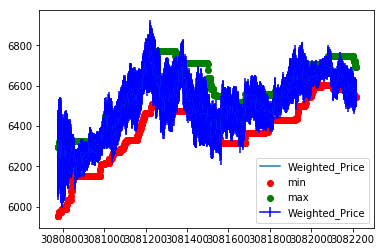

In [94]:
plt.plot(df.index, df.Weighted_Price)
plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')
plt.errorbar(df.index, df.Weighted_Price,yerr=2*df.SD, fmt='b')
plt.legend()
plt.show()